In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/Salary_Data.csv')
data

In [ ]:
# data.info()
# data.shape
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
### feature - it should be an array or dataframe (2D array) -- shape of array should be no of samples, no of features
### Target - it should be an array or dataframe (2D array or 1D array) -- shape of array should be no of samples, no of features

# d = data[["YearsExperience"]].values
# d = data[["YearsExperience"]].to_numpy()
# #(d = data["YearsExperience"].values ##
# #X = data.reshape(len(x),1)) ##
## or 
X = np.array(data[['YearsExperience']])
X.shape

(30, 1)

In [ ]:
y = np.array(data["Salary"])
y.shape

(30,)

In [ ]:
### split the data  into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8 , random_state = 9014)

In [ ]:
X_test

array([[ 3.2],
       [ 7.9],
       [ 2. ],
       [ 3.9],
       [10.3],
       [ 9.5]])

In [ ]:
### Build the model 
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
### train the model
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
ypred = model.predict(X_test)
ypred

array([ 56182.55053157, 100294.69682063,  44919.8748833 ,  62752.44465973,
       122820.04811718, 115311.59768499])

In [ ]:
y_test

array([ 54445., 101302.,  43525.,  63218., 122391., 116969.])

In [ ]:
## R2 score / R- rsqure
from sklearn.metrics import r2_score
r2 = r2_score(y_test,ypred)
Acc = r2*100
print(round(Acc , 2))

99.84


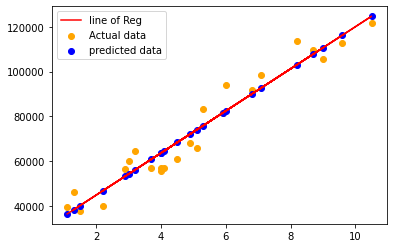

In [ ]:
### plot the regression line Training sample
plt.scatter(X_train,y_train,color = "orange",label = "Actual data")
plt.scatter(X_train,model.predict(X_train),color = "blue",label = "predicted data")
plt.plot(X_train,model.predict(X_train),color = "red" , label = "line of Reg")
plt.legend()
plt.show()

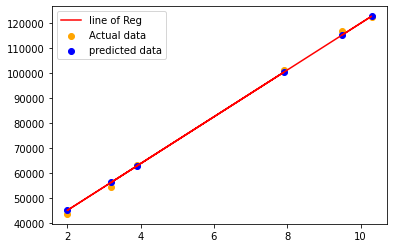

In [ ]:
### plot the regression line Testing sample
plt.scatter(X_test,y_test,color = "orange",label = "Actual data")
plt.scatter(X_test,ypred,color = "blue",label = "predicted data")
plt.plot(X_test,ypred,color = "red" , label = "line of Reg")
plt.legend()
plt.show()

In [ ]:
### Y _ intercept
C = model.intercept_
### slope
M = model.coef_
print([C,M])

[26148.74880284306, array([9385.56304023])]


In [ ]:
score = []
for i in range(10000):
  X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,train_size = 0.8 , random_state = i)
  model = LinearRegression()
  model.fit(X_train1,y_train1)
  ypred_1 = model.predict(X_test1)
  r2_1 = r2_score(y_test1,ypred_1)
  score.append(r2_1)
print(score)  

[0.988169515729126, 0.7616681465472094, 0.8886956733784563, 0.9695039421049821, 0.9504404484884267, 0.9439628569611376, 0.9368146227107087, 0.8143022783109006, 0.9631182154839476, 0.9388416537799072, 0.9816423482070253, 0.940882728477622, 0.9429269163491423, 0.9394460269118793, 0.9606215790278543, 0.8697012433817218, 0.7949890249259297, 0.9384744808306155, 0.8864330645841889, 0.9415531751862448, 0.9441299149555877, 0.9398582853702572, 0.8870702615446784, 0.9184170849214232, 0.9520702017424296, 0.9531732818427658, 0.9835849730044816, 0.9636425773684423, 0.9217841352107623, 0.9467172742609803, 0.9944092048209745, 0.8967649524853983, 0.8985995727228404, 0.9350785573211586, 0.9244141448042442, 0.8839476512584652, 0.955021106900739, 0.9778242092591888, 0.972479448737762, 0.9928344802911048, 0.7775083459037234, 0.9802519469633169, 0.9024461774180497, 0.8688045158887867, 0.934951117043928, 0.9250487875802145, 0.9789129767378081, 0.98399193890564, 0.980277279178695, 0.9497670285223544, 0.88246

In [ ]:
np.max(score)

0.99842716176972

In [ ]:
np.argmax(score)

9014

In [ ]:
### predict a new model
years = int(input("Enter no of years  "))
salary = model.predict([[years]])
print("The salary is  " + str(np.round(salary[0])))

Enter no of years  7
The salary is  92241.0


In [ ]:
### save the model
import joblib as jb
jb.dump(model,'mymodel.pkl')

['mymodel.pkl']

In [ ]:
### load the model
mymodel = jb.load("/content/mymodel.pkl")

In [ ]:
### predict a new model
years = int(input("Enter no of years  "))
salary = mymodel.predict([[years]])
print("The salary is  " + str(np.round(salary[0])))

Enter no of years  7
The salary is  92241.0
